# Session 6

1. Séries temporelles
2. Graphiques avec pandas
3. Graphiques avec matplotlib
4. Graphiques avec seaborn
5. Cartes : matplotlib, plotly et ipyleaflet

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. Séries temporelles

Le module datetime :
- **date**: date (year, month, day) calendrier Grégorien
- **time**: temps (hours, minutes, seconds, microseconds)
- **datetime**: timestamp (date + time)
- **timedelta**: durée, différence entre 2 dates ou 2 temps (days, hours, minutes, seconds, microseconds)
- **tzinfo**: gestion des fuseaux horaires (time zones)

Voir : https://docs.python.org/fr/3.7/library/datetime.html

In [2]:
# import
import datetime

### 1.1 Objets temporels

In [3]:
# date
today = datetime.date.today()
today

datetime.date(2021, 10, 20)

In [4]:
# datetime
now = datetime.datetime.now()
now

datetime.datetime(2021, 10, 20, 13, 46, 21, 173732)

In [5]:
# UTC datetime
now_utc = datetime.datetime.utcnow()
now_utc

datetime.datetime(2021, 10, 20, 11, 46, 21, 185404)

In [6]:
# timedelta
today - datetime.date(2021, 1, 1)

datetime.timedelta(days=292)

In [7]:
# addition entre une date et un timedelta
now + datetime.timedelta(days=100)

datetime.datetime(2022, 1, 28, 13, 46, 21, 173732)

In [8]:
# différence entre une date et un timedelta
now - datetime.timedelta(days=100)

datetime.datetime(2021, 7, 12, 13, 46, 21, 173732)

In [9]:
# import pytz
from pytz import timezone

In [10]:
# build a timezone object
tz = timezone('Asia/Shanghai')
tz

<DstTzInfo 'Asia/Shanghai' LMT+8:06:00 STD>

In [11]:
# convertion d'un datetime selon un fuseau horaire
now.astimezone(tz)

datetime.datetime(2021, 10, 20, 19, 46, 21, 173732, tzinfo=<DstTzInfo 'Asia/Shanghai' CST+8:00:00 STD>)

### 1.2 Ecriture et lecture

- strftime() : écrire un datetime selon un format donné
- strptime() : lire un datetime selon un format donné

Directives | Comments
- | -
%a | Day of the week abbreviated
%A | Day of the week
%w | Day of the week 0 = Sunday ... 6 = Saturday
%d | Day of month on 2 digits 01, 02, ..., 31
%j | Day of year on 3 digits 001, 002, ..., 366
%b | Month abbreviated
%B | Month name
%m | Month on 2 digits 01, 02, ..., 12
%U | Number of week in year (Sunday = first day)
%W | Number of week in year (Monday = first day)
%y | Year without the century on 2 digits 00, 01, ..., 99	 
%Y | Year with the century on 4 digits 0001, 0002, ..., 2018, 2019, ..., 9998, 9999
%H | Hour over 24 00, 01, ..., 23
%I | Hour over 12 01, 02, ..., 12
%p | AM or PM
%M | Minute on 2 digits 00, 01, ..., 59
%S | Second on 2 digits 00, 01, ..., 59
%f | Microsecond on 6 digits 000000, 000001, ..., 999999
%z | UTC offset +HHMM or -HHMM
%Z | Time zone 
%c | Representation date and temps
%x | Representation date
%X | Representation time
%% | Character %

In [12]:
# datetime
now = datetime.datetime.now()
now

datetime.datetime(2021, 10, 20, 13, 46, 22, 182638)

In [13]:
# jour dela semaine
now.strftime("%A %d/%m/%Y")

'Wednesday 20/10/2021'

In [14]:
# locale
# mettre parfois fr_FR ou fr_FR.UTF-8 au lien de fr, etc.
import locale
#locale.setlocale(locale.LC_ALL, 'ar') # arabic
#locale.setlocale(locale.LC_ALL, 'de') # german
#locale.setlocale(locale.LC_ALL, 'es') # spanish
#locale.setlocale(locale.LC_ALL, 'en') # english
#locale.setlocale(locale.LC_ALL, 'fa') # iranian
locale.setlocale(locale.LC_ALL, 'fr_FR') # french
#locale.setlocale(locale.LC_ALL, 'hi') # hindi
#locale.setlocale(locale.LC_ALL, 'he') # hebrew
#locale.setlocale(locale.LC_ALL, 'it') # italian
#locale.setlocale(locale.LC_ALL, 'ja') # japanese
#locale.setlocale(locale.LC_ALL, 'lt') # lithuanian 
#locale.setlocale(locale.LC_ALL, 'ko') # korean
#locale.setlocale(locale.LC_ALL, 'ro') # romanian
#locale.setlocale(locale.LC_ALL, 'ru') # russian
#locale.setlocale(locale.LC_ALL, 'sr') # serbian
#locale.setlocale(locale.LC_ALL, 'tr') # turkish
#locale.setlocale(locale.LC_ALL, 'zh') # chinese
now.strftime("%A %B %d/%m/%Y")

'Mercredi octobre 20/10/2021'

In [15]:
# lecture au format : AA-MM-DD-HH-MM
# écriture au format : HH:MM DD/MM/YYYY
var = datetime.datetime.strptime("20-11-04-10-30", "%y-%m-%d-%H-%M")
var.strftime("%H:%M %d/%m/%Y")

'10:30 04/11/2020'

**Exercice n° 1**


- Prendre le DataFrame des villes 'cities500.txt', combien a-t-on de fuseaux horaires ?
- Remplacez les valeurs de la colonne "timezone" par des objets "timezone".
- Prenez le datetime courant (now), convertissez-le avec toutes les valeurs de la colonne "timezone", et produisez des chaines de caractères au format format: `'%Y-%m-%d %H:%M:%S'`
- Il y a 24 heures dans une journée, combien obtient-on de fuseaux horaires différents ?

In [16]:
df = pd.read_csv('cities500.zip',
                 sep='\t',
                 header=None,
                 keep_default_na=False,  # NA = North America
                 na_values=['', -9999],
                 names=['geonameid', 'name', 'asciiname', 'alternatenames', 'latitude', 
                        'longitude', 'feature class', 'feature code', 'country code', 
                        'cc2', 'admin1 code', 'admin2 code', 'admin3 code', 'admin4 code', 
                        'population', 'elevation', 'dem', 'timezone', 'modification date'],
                dtype={'admin1 code': str,
                       'admin2 code': str,
                       'admin3 code': str,
                       'admin4 code': str})
df.head()

,geonameid,name,asciiname,alternatenames,latitude,longitude,feature class,feature code,country code,cc2,admin1 code,admin2 code,admin3 code,admin4 code,population,elevation,dem,timezone,modification date
0,3038999,Soldeu,Soldeu,NaN,42.57688,1.66769,P,PPL,AD,NaN,02,NaN,NaN,NaN,602,NaN,1832.0,Europe/Andorra,2017-11-06
1,3039154,El Tarter,El Tarter,"Ehl Tarter,Эл Тартер",42.57952,1.65362,P,PPL,AD,NaN,02,NaN,NaN,NaN,1052,NaN,1721.0,Europe/Andorra,2012-11-03
2,3039163,Sant Julià de Lòria,Sant Julia de Loria,"San Julia,San Julià,Sant Julia de Loria,Sant J...",42.46372,1.49129,P,PPLA,AD,NaN,06,NaN,NaN,NaN,8022,NaN,921.0,Europe/Andorra,2013-11-23
3,3039604,Pas de la Casa,Pas de la Casa,"Pas de la Kasa,Пас де ла Каса",42.54277,1.73361,P,PPL,AD,NaN,03,NaN,NaN,NaN,2363,2050.0,2106.0,Europe/Andorra,2008-06-09
4,3039678,Ordino,Ordino,"Ordino,ao er di nuo,orudino jiao qu,Ордино,オルデ...",42.55623,1.53319,P,PPLA,AD,NaN,05,NaN,NaN,NaN,3066,NaN,1296.0,Europe/Andorra,2018-10-26


In [17]:
df['timezone'].apply(timezone)

0         Europe/Andorra
1         Europe/Andorra
2         Europe/Andorra
3         Europe/Andorra
4         Europe/Andorra
               ...      
197244     Africa/Harare
197245     Africa/Harare
197246     Africa/Harare
197247     Africa/Harare
197248     Africa/Harare
Name: timezone, Length: 197249, dtype: object

In [20]:
df['timezone'].apply(timezone).apply(lambda x: now.astimezone(x)).apply(lambda x: x.strftime('%Y-%m-%d %H:%M:%S'))

0         2021-10-20 13:46:22
1         2021-10-20 13:46:22
2         2021-10-20 13:46:22
3         2021-10-20 13:46:22
4         2021-10-20 13:46:22
                 ...         
197244    2021-10-20 13:46:22
197245    2021-10-20 13:46:22
197246    2021-10-20 13:46:22
197247    2021-10-20 13:46:22
197248    2021-10-20 13:46:22
Name: timezone, Length: 197249, dtype: object

In [21]:
df['timezone'].apply(timezone).apply(lambda x: now.astimezone(x)).apply(lambda x: x.strftime('%Y-%m-%d %H:%M:%S')).nunique()

36

### 1.3 Séries temporelles

In [22]:
def df_taux_change(devises):
    df = pd.read_csv("Webstat_Export_20210929.csv",
                     sep=";",
                     na_values='-',
                     decimal=',',
                     skiprows=[0, 1, 3, 4, 5],  # le skiprows permet à l'option "decimal" de fonctionner
                     converters={0: lambda x: pd.to_datetime(x, format='%d/%m/%Y', errors='ignore')})

    # extraction des codes monnaies
    cols = pd.Series(df.columns.tolist()).str.extract('\(([A-Z]{3})\)', expand=True)
    cols.iloc[0] = 'Date'
    df.columns = cols[0]

    # selection des devises
    df = df[['Date'] + devises]

    # drop na
    df = df.dropna()

    # set index
    df = df.set_index('Date')
    
    return df

In [23]:
df = df_taux_change(['USD', 'CHF', 'GBP', 'JPY', 'RUB', 'CNY'])
df.head()

,USD,CHF,GBP,JPY,RUB,CNY
Date,,,,,,
2021-09-28,1.1678,1.0840,0.85950,130.17,84.7497,7.5433
2021-09-27,1.1698,1.0850,0.85420,129.74,84.9955,7.5609
2021-09-24,1.1719,1.0830,0.85703,129.49,85.5104,7.5803
2021-09-23,1.1715,1.0831,0.85495,128.88,85.2372,7.5643
2021-09-22,1.1729,1.0820,0.86000,128.50,85.3877,7.5850


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5555 entries, 2021-09-28 to 2000-01-13
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   USD     5555 non-null   float64
 1   CHF     5555 non-null   float64
 2   GBP     5555 non-null   float64
 3   JPY     5555 non-null   float64
 4   RUB     5555 non-null   float64
 5   CNY     5555 non-null   float64
dtypes: float64(6)
memory usage: 303.8 KB


**L'accesseur dt**

In [25]:
# reset_index
df = df.reset_index()
df.head()

,Date,USD,CHF,GBP,JPY,RUB,CNY
0,2021-09-28,1.1678,1.0840,0.85950,130.17,84.7497,7.5433
1,2021-09-27,1.1698,1.0850,0.85420,129.74,84.9955,7.5609
2,2021-09-24,1.1719,1.0830,0.85703,129.49,85.5104,7.5803
3,2021-09-23,1.1715,1.0831,0.85495,128.88,85.2372,7.5643
4,2021-09-22,1.1729,1.0820,0.86000,128.50,85.3877,7.5850


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5555 entries, 0 to 5554
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5555 non-null   datetime64[ns]
 1   USD     5555 non-null   float64       
 2   CHF     5555 non-null   float64       
 3   GBP     5555 non-null   float64       
 4   JPY     5555 non-null   float64       
 5   RUB     5555 non-null   float64       
 6   CNY     5555 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 303.9 KB


In [27]:
# access to year
df['Date'].dt.year

0       2021
1       2021
2       2021
3       2021
4       2021
        ... 
5550    2000
5551    2000
5552    2000
5553    2000
5554    2000
Name: Date, Length: 5555, dtype: int64

In [28]:
# access to month
df['Date'].dt.month

0       9
1       9
2       9
3       9
4       9
       ..
5550    1
5551    1
5552    1
5553    1
5554    1
Name: Date, Length: 5555, dtype: int64

In [29]:
# access to week days
df['Date'].dt.weekday

0       1
1       0
2       4
3       3
4       2
       ..
5550    2
5551    1
5552    0
5553    4
5554    3
Name: Date, Length: 5555, dtype: int64

**Sélection de données temporelles**

In [30]:
# setting the index as a datetime object
df = df.set_index('Date')
df = df.sort_index()
df

,USD,CHF,GBP,JPY,RUB,CNY
Date,,,,,,
2000-01-13,1.0276,1.6111,0.62550,108.89,29.4837,8.5054
2000-01-14,1.0225,1.6130,0.62210,108.05,29.2350,8.4632
2000-01-17,1.0094,1.6136,0.61800,105.81,28.9738,8.3548
2000-01-18,1.0093,1.6131,0.61740,106.42,28.8510,8.3540
2000-01-19,1.0105,1.6120,0.61720,106.99,28.8815,8.3639
...,...,...,...,...,...,...
2021-09-22,1.1729,1.0820,0.86000,128.50,85.3877,7.5850
2021-09-23,1.1715,1.0831,0.85495,128.88,85.2372,7.5643
2021-09-24,1.1719,1.0830,0.85703,129.49,85.5104,7.5803


In [31]:
# yearly data
df.loc['2021']

,USD,CHF,GBP,JPY,RUB,CNY
Date,,,,,,
2021-01-04,1.2296,1.0811,0.90160,126.62,90.3420,7.9484
2021-01-05,1.2271,1.0803,0.90333,126.25,91.6715,7.9315
2021-01-06,1.2338,1.0821,0.90635,127.03,90.8175,7.9653
2021-01-07,1.2276,1.0833,0.90190,127.13,91.2000,7.9392
2021-01-08,1.2250,1.0827,0.90128,127.26,90.8000,7.9184
...,...,...,...,...,...,...
2021-09-22,1.1729,1.0820,0.86000,128.50,85.3877,7.5850
2021-09-23,1.1715,1.0831,0.85495,128.88,85.2372,7.5643
2021-09-24,1.1719,1.0830,0.85703,129.49,85.5104,7.5803


In [32]:
# monthly data
df.loc['2020/01'] # or df.loc['01/2020']

,USD,CHF,GBP,JPY,RUB,CNY
Date,,,,,,
2020-01-02,1.1193,1.0865,0.84828,121.75,69.1893,7.7946
2020-01-03,1.1147,1.0840,0.85115,120.54,69.1190,7.7712
2020-01-06,1.1194,1.0850,0.85215,121.02,69.4047,7.8049
2020-01-07,1.1172,1.0850,0.85183,121.15,69.2576,7.7562
2020-01-08,1.1115,1.0792,0.84868,120.86,68.6389,7.7184
2020-01-09,1.1110,1.0808,0.85285,121.54,68.0757,7.7011
2020-01-10,1.1091,1.0822,0.84810,121.60,68.0410,7.6773
2020-01-13,1.1126,1.0811,0.85760,122.25,68.0893,7.6697
2020-01-14,1.1115,1.0767,0.85618,122.32,68.2418,7.6536


In [33]:
# slice selection
df.loc['12/2019':'01/2020']

,USD,CHF,GBP,JPY,RUB,CNY
Date,,,,,,
2019-12-02,1.1023,1.0995,0.85218,120.75,70.9217,7.7625
2019-12-03,1.1071,1.0947,0.85200,120.39,71.0634,7.8140
2019-12-04,1.1081,1.0956,0.84610,120.45,70.7959,7.8149
2019-12-05,1.1094,1.0964,0.84470,120.69,70.7798,7.8125
2019-12-06,1.1094,1.0968,0.84453,120.44,70.7441,7.7993
2019-12-09,1.1075,1.0959,0.84195,120.15,70.5731,7.7960
2019-12-10,1.1077,1.0922,0.84073,120.27,70.4627,7.7968
2019-12-11,1.1075,1.0916,0.84245,120.44,70.3925,7.7960
2019-12-12,1.1137,1.0939,0.84560,120.95,70.0885,7.8374


### Réindexation temporelle

La fonction date_range() permet de construire un nouvel index sur la base de limites et d'une fréquence donnée.

In [34]:
# nouvel index avec toutes les dates
newindex = pd.date_range(start=df.index[0], end=df.index[-1], freq='D')
newindex

DatetimeIndex(['2000-01-13', '2000-01-14', '2000-01-15', '2000-01-16',
               '2000-01-17', '2000-01-18', '2000-01-19', '2000-01-20',
               '2000-01-21', '2000-01-22',
               ...
               '2021-09-19', '2021-09-20', '2021-09-21', '2021-09-22',
               '2021-09-23', '2021-09-24', '2021-09-25', '2021-09-26',
               '2021-09-27', '2021-09-28'],
              dtype='datetime64[ns]', length=7930, freq='D')

La méthode reindex() va produire un nouveau DataFrame avec des valeurs manquantes si le nouvel index comprend des valeurs nouvelles.

In [35]:
# réindexation temporelle
var = df.reindex(newindex)
var.head()

,USD,CHF,GBP,JPY,RUB,CNY
2000-01-13,1.0276,1.6111,0.6255,108.89,29.4837,8.5054
2000-01-14,1.0225,1.6130,0.6221,108.05,29.2350,8.4632
2000-01-15,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-16,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-17,1.0094,1.6136,0.6180,105.81,28.9738,8.3548


Différentes méthodes permettent de combler les valeurs manquantes.

In [36]:
# fillna forward
var.fillna(method='ffill').head()

,USD,CHF,GBP,JPY,RUB,CNY
2000-01-13,1.0276,1.6111,0.6255,108.89,29.4837,8.5054
2000-01-14,1.0225,1.6130,0.6221,108.05,29.2350,8.4632
2000-01-15,1.0225,1.6130,0.6221,108.05,29.2350,8.4632
2000-01-16,1.0225,1.6130,0.6221,108.05,29.2350,8.4632
2000-01-17,1.0094,1.6136,0.6180,105.81,28.9738,8.3548


In [37]:
# fillna backward
var.fillna(method='bfill').head()

,USD,CHF,GBP,JPY,RUB,CNY
2000-01-13,1.0276,1.6111,0.6255,108.89,29.4837,8.5054
2000-01-14,1.0225,1.6130,0.6221,108.05,29.2350,8.4632
2000-01-15,1.0094,1.6136,0.6180,105.81,28.9738,8.3548
2000-01-16,1.0094,1.6136,0.6180,105.81,28.9738,8.3548
2000-01-17,1.0094,1.6136,0.6180,105.81,28.9738,8.3548


La méthode interpolate() remplace les valeurs manquantes par une interpolation linéraire.

In [38]:
# interpolate 
var.interpolate().head()

,USD,CHF,GBP,JPY,RUB,CNY
2000-01-13,1.027600,1.6111,0.625500,108.890000,29.483700,8.505400
2000-01-14,1.022500,1.6130,0.622100,108.050000,29.235000,8.463200
2000-01-15,1.018133,1.6132,0.620733,107.303333,29.147933,8.427067
2000-01-16,1.013767,1.6134,0.619367,106.556667,29.060867,8.390933
2000-01-17,1.009400,1.6136,0.618000,105.810000,28.973800,8.354800


In [39]:
# numpy linspace
np.linspace(0, 100, 21)

array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
        55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100.])

In [40]:
# interpolate linear = numpy.linspace (lignes 1 et 4 pour ligne 2 et 3)
array = np.linspace(var.iloc[1, :], var.iloc[4, :], 4)
pd.DataFrame(array)

,0,1,2,3,4,5
0,1.022500,1.6130,0.622100,108.050000,29.235000,8.463200
1,1.018133,1.6132,0.620733,107.303333,29.147933,8.427067
2,1.013767,1.6134,0.619367,106.556667,29.060867,8.390933
3,1.009400,1.6136,0.618000,105.810000,28.973800,8.354800


**Agrégations temporelles**

Méthode resample qui se comporte comme un groupby.

In [41]:
# yearly aggregation
df.resample('A').size()

Date
2000-12-31    247
2001-12-31    254
2002-12-31    255
2003-12-31    255
2004-12-31    259
2005-12-31    257
2006-12-31    255
2007-12-31    255
2008-12-31    256
2009-12-31    256
2010-12-31    258
2011-12-31    257
2012-12-31    256
2013-12-31    255
2014-12-31    255
2015-12-31    256
2016-12-31    257
2017-12-31    255
2018-12-31    255
2019-12-31    255
2020-12-31    257
2021-12-31    190
Freq: A-DEC, dtype: int64

In [42]:
# yearly aggregation
df.resample('A').max()

,USD,CHF,GBP,JPY,RUB,CNY
Date,,,,,,
2000-12-31,1.0276,1.6147,0.64020,111.88,29.4837,8.5054
2001-12-31,0.9545,1.5434,0.64080,115.90,27.5286,7.9004
2002-12-31,1.0487,1.4856,0.65050,125.18,33.5108,8.6801
2003-12-31,1.2630,1.5729,0.72350,140.31,36.9555,10.4539
2004-12-31,1.3633,1.5838,0.70880,141.03,37.9096,11.2840
2005-12-31,1.3507,1.5635,0.70725,143.47,37.4442,11.1797
2006-12-31,1.3331,1.6069,0.70060,156.93,34.8930,10.4272
2007-12-31,1.4874,1.6803,0.73480,168.68,36.1180,10.9950
2008-12-31,1.5990,1.6529,0.97855,169.75,41.6925,11.1699


In [43]:
# monthly aggregation
df.resample('MS').mean()

,USD,CHF,GBP,JPY,RUB,CNY
Date,,,,,,
2000-01-01,1.004985,1.612115,0.612831,106.091538,28.742685,8.318246
2000-02-01,0.983424,1.606886,0.614657,107.640952,28.288986,8.139800
2000-03-01,0.964343,1.604243,0.610626,102.590870,27.466526,7.981870
2000-04-01,0.946950,1.573956,0.598017,99.924444,27.098239,7.837911
2000-05-01,0.905968,1.556164,0.601509,98.090455,25.657673,7.498705
...,...,...,...,...,...,...
2021-05-01,1.214590,1.096829,0.862583,132.569048,89.873662,7.810919
2021-06-01,1.204709,1.094000,0.858720,132.631364,87.456068,7.739114
2021-07-01,1.182182,1.085595,0.856130,130.349091,87.397018,7.653632


Alias | Offset type | Description
- | - | -
D | Day | Calendar daily
B | BusinessDay | Business daily
H | Hour | Hourly
T or min | Minute | Minutely
S | Second | Secondly
L or ms | Milli | Millisecond (1/1000th of 1 second)
U | Micro | Microsecond (1/1000000th of 1 second)
M | MonthEnd | Last calendar day of month
BM | BusinessMonthEnd | Last business day (weekday) of month
MS | MonthBegin | First calendar day of month
BMS | BusinessMonthBegin | First weekday of month
W-MON, W-TUE, ... | Week | Weekly on given day of week: MON, TUE, WED, THU, FRI, SAT, or SUN.
Q-JAN, Q-FEB, ... | QuarterEnd | Quarterly dates anchored on last calendar day of each month,for year ending in indicated month: JAN, FEB, MAR, APR, MAY, JUN, JUL, AUG, SEP, OCT, NOV, or DEC.
A-JAN, A-FEB, ... | YearEnd | Annual dates anchored on last calendar day of given month: JAN, FEB, MAR, APR, MAY, JUN, JUL, AUG, SEP, OCT, NOV, or DEC.

Source: Python for Data Analysis, Wes McKinney, O'Reilly

**Graphiques temporels**

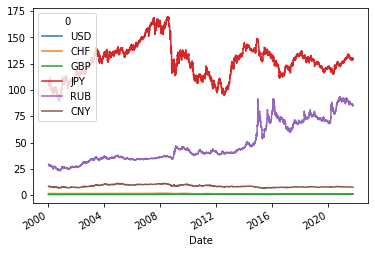

In [44]:
# taux de change
df.plot();

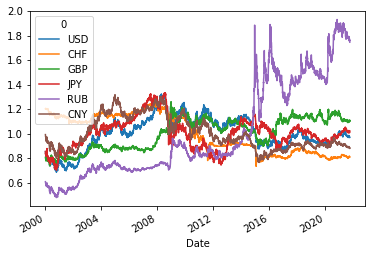

In [45]:
# taux de change divisés par leur moyenne
(df / df.mean()).plot();

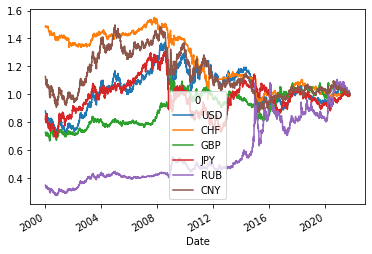

In [46]:
# taux de change divisés par la dernière valeur
(df / df.iloc[-1]).plot();

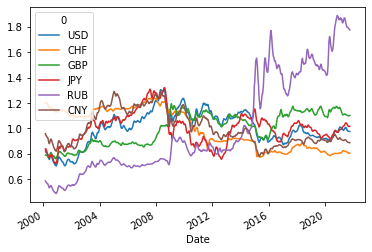

In [47]:
# taux de change divisés par leur moyenne avec une moyenne glissante de 30 jours
(df / df.mean()).rolling(30).mean().plot()
plt.show()

**Exercice n° 2**

Affichez les taux de change divisés par la dernière valeur connueavec une moyenne glissante de 30 jours.

Affichez les taux de change divisés par leur moyenne avec un maximum glissant sur 100 jours.

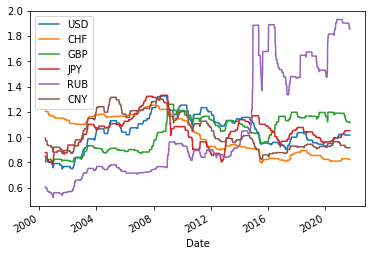

In [50]:
(df/df.mean()).rolling(100).max().plot()
plt.legend()

## 2. Graphiques avec pandas

pandas propose une API relativement simple qui s'appuie sur matplotlib.

https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

#### Data Names US et FR

In [52]:
# names US
def df_names_us():
    dfs = []
    for year in range(1880, 2020):
        csv = pd.read_csv(f'names/yob{year}.txt',
                          names=['name', 'gender', 'births'])
        csv['year'] = year
        dfs.append(csv)
    df = pd.concat(dfs, ignore_index=True)
    df = df[['year', 'name', 'gender', 'births']]
    return df

df_us = df_names_us()
df_us.shape

(1989592, 4)

In [56]:
def df_names_fr():
    # dict for gender
    d = {'1': 'M', '2': 'F'}
    # read table
    # no header
    # set columns
    # user converters for gender and name
    df = pd.read_csv('nat2020.csv',
                      sep=';',
                      header=0,
                      names=['gender', 'name', 'year', 'births'],
                      converters={
                          'gender': d.get,
                          'name': str.title
                      })
    # select usable data
    # name with length > 1
    # year != 'XXXX'
    # name != '_Prenoms_Rares' (after use of str.title)
    df = df.loc[(df['name'].str.len() > 1)
                & (df['year'] != 'XXXX')
                & (df['name'] != '_Prenoms_Rares')]
    # set year type to int
    df['year'] = df['year'].astype(int)
    # set columns order
    df = df[['year', 'name', 'gender', 'births']]
    # sort data
    df = df.sort_values(['year', 'gender', 'births', 'name'],
                   ascending=[True, True, False, True])
    # reset index
    df = df.reset_index(drop=True)
    return df

df_fr = df_names_fr()
df_fr.shape

(630407, 4)

In [100]:
df_fr['country'] = 'fr'

In [101]:
df_us['country'] = 'us'

In [102]:
df = pd.concat([df_fr, df_us])

**Exercice n° 3**

Combinez les 2 DataFrames en un seul DataFrame avec une colonne en plus "country" valant "us" ou "fr".

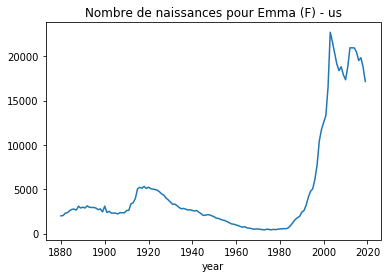

In [103]:
# exemple
tab = df.loc[(df['country'] == 'us') & (df['name'] == 'Emma') & (df['gender'] == 'F')]
tab = tab.set_index('year')
tab['births'].plot(title='Nombre de naissances pour Emma (F) - us');

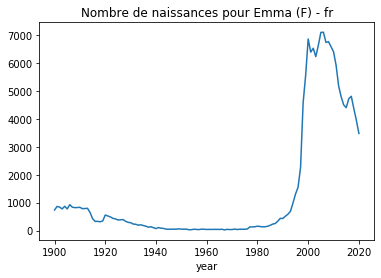

In [104]:
# exemple
tab = df.loc[(df['country'] == 'fr') & (df['name'] == 'Emma') & (df['gender'] == 'F')]
tab = tab.set_index('year')
tab['births'].plot(title='Nombre de naissances pour Emma (F) - fr');

In [105]:
# quelques fonctions
def select(country, name, gender):
    return df.loc[(df['country'] == country) &
                  (df['name'] == name) &
                  (df['gender'] == gender)]

def plot_names(country, name, gender):
    tab = select(country, name, gender)
    tab = tab.set_index('year')
    tab['births'].plot(title=f'Nombre de naissances pour {name} ({gender}) - {country}');

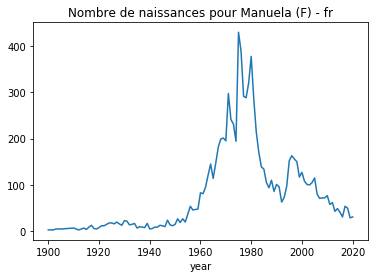

In [117]:
plot_names('fr', 'Manuela', 'F')

**Exercice n° 4**

Afficher l'évolution du nombre de naissances US ou FR par année et par genre.

Afficher l'évolution de la diversité des prénoms US ou FR par année et par genre.

**bar plot**

In [125]:
# sélection + pivot
top10 = ['Camille', 'Louise', 'Léa', 'Ambre', 'Agathe',
         'Louis', 'Gabriel', 'Léo', 'Maël', 'Paul']
selection = df.loc[(df['year'] == 2020) & (df['country'] == 'fr') & df['name'].isin(top10)]
tab = selection.pivot_table(values='births',
                      index='name',
                      aggfunc='sum')
tab

,births
name,
Agathe,1927
Ambre,2752
Camille,2569
Gabriel,4415
Louis,3795
Louise,3811
Léa,2429
Léo,4504
Maël,3301


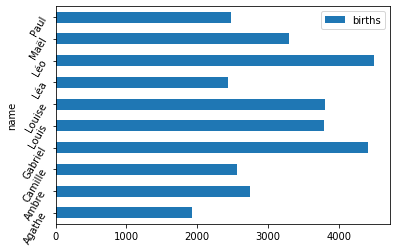

In [127]:
# bar plot
tab.plot(kind='barh', rot=60);  # testez avec barh

#### pie plot

In [128]:
# sélection + pivot
selection = df.loc[df['name']=='Jean']
tab = selection.pivot_table(values='births',
                            index='gender',
                            aggfunc='sum')
tab

,births
gender,
F,458485
M,1938216


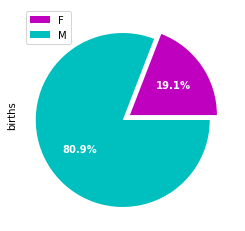

In [129]:
# pie plot
tab.plot(kind='pie',
         y='births',
         colors=['m', 'c'],
         autopct='%1.1f%%',
         textprops={'color': 'w', 'weight': 'bold'},
         explode=(0.0, 0.1));

## 3. Graphiques avec matplotlib

- Objet principal : Figure
- Sous-graphiques : Axes à ne pas confondre avec les axes (axis en anglais)

Méthodes :
- add_subplot(ligne, colonne, n° de figure) ou 111, 121, 122... si < 10, par sous-graphique
- 221, 222, 223, 224
- subplots(nb lignes, nb colonnes) pour tous les sous-graphiques

On utilise la sous-librairie pyplot.

Voir : https://matplotlib.org/

#### Plusieurs courbes en un grahique

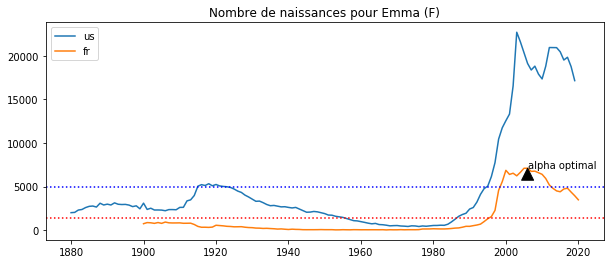

In [130]:
# plusieurs courbes en un grahique
fig = plt.figure(figsize=(10, 4))
name, gender = 'Emma', 'F'

ax1 = fig.add_subplot(111)
ax1.set_title(f'Nombre de naissances pour {name} ({gender})')

country = 'us'
tab = select(country, name, gender)
tab = tab.set_index('year')
b = tab['births']
mean_us = b.mean()
ax1.plot(b);

country = 'fr'
tab = select(country, name, gender)
tab = tab.set_index('year')
b = tab['births']
mean_fr = b.mean()
ax1.plot(b);

ax1.axhline(y=mean_us, color='b', ls=':')
ax1.axhline(y=mean_fr, color='r', ls=':')

xmax = tab['births'].idxmax()
ymax = tab['births'].max()
plt.annotate('alpha optimal',
             xy=(xmax, ymax),
             xytext=(xmax, ymax+50),
             arrowprops=dict(facecolor='black', shrink=0.01))

ax1.legend(['us', 'fr']);

#### Plusieurs grahiques avec add_subplot()

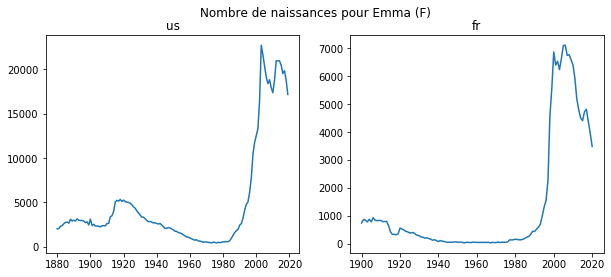

In [133]:
def plot_country_name_gender(country, name, gender, ax):
    tab = select(country, name, gender)
    tab = tab.set_index('year')
    ax.set_title(f'{country}')
    ax.plot(tab['births']);
      
fig = plt.figure(figsize=(10, 4))
name, gender = 'Emma', 'F'

fig.suptitle(f'Nombre de naissances pour {name} ({gender})')

country = 'us'
ax1 = fig.add_subplot(121)
plot_country_name_gender(country, name, gender, ax1)

country = 'fr'
ax2 = fig.add_subplot(122)
plot_country_name_gender(country, name, gender, ax2)

#### Plusieurs grahiques avec subplots()

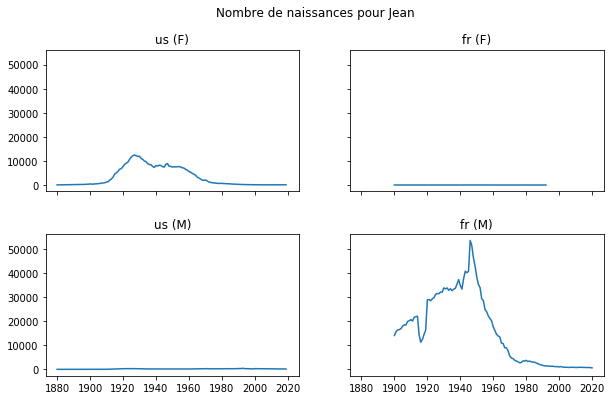

In [134]:
def plot_country_name_gender(country, name, gender, ax):
    tab = select(country, name, gender)
    tab = tab.set_index('year')
    ax.set_title(f'{country} ({gender})')
    ax.plot(tab['births']);
      
name = 'Jean'
fig = plt.figure(figsize=(10, 6))
fig.suptitle(f'Nombre de naissances pour {name}')
# tableau lignes x colonnes
[[ax1, ax2], [ax3, ax4]] = fig.subplots(2, 2, sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.3)  # séparation verticale

plot_country_name_gender('us', name, 'F', ax1)
plot_country_name_gender('fr', name, 'F', ax2)
plot_country_name_gender('us', name, 'M', ax3)
plot_country_name_gender('fr', name, 'M', ax4)

In [135]:
#plt.Axes.plot?

> plot(x, y, color='green', marker='o', linestyle='dashed',
> ...      linewidth=2, markersize=12)

Dans matplotlib il y a :
- 4 types de lignes: '-' (solid), '--' (dashed), ':' (dotted), '-.' (dashdotted)
- plusieurs referentiels de couleurs :
    - 8 couleurs basiques : 'b' (blue), 'c' (cyan), 'g' (green), 'k' (black), 'm' (magenta), 'r' (red), 'w' (white) and 'y' (yellow)
    - niveaux de gris : nombres sous forme de chaines entre '0.0' (noir) et '1.0' (blanc)
    - 148 couleurs nommées : voir la variable matplotlib.colors.cnames
    - 16+ millions de couleurs RVB en hexadecimal: #xxyyzz
- 41 marqueurs : see variable matplotlib.lines.Line2D.markers
- linewidth peut être remplacé par lw
- linestyle peut être remplacé par ls

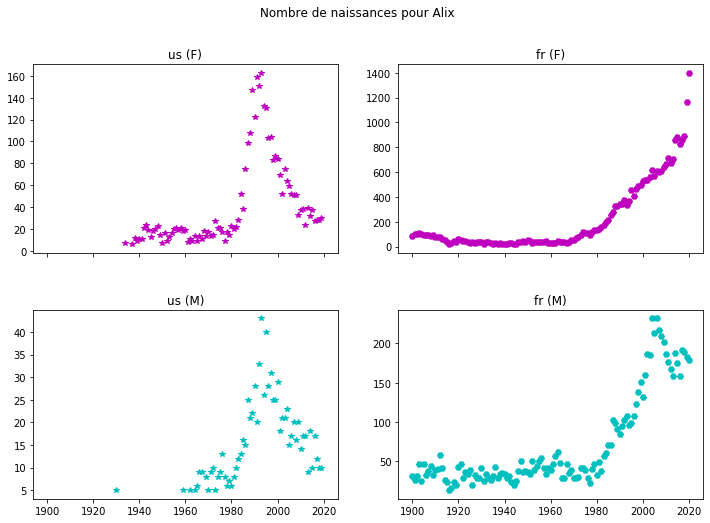

In [136]:
def plot_country_name_gender(country, name, gender, ax):
    tab = select(country, name, gender)
    tab = tab.set_index('year')
    ax.set_title(f'{country} ({gender})')
    ax.plot(tab['births'],
            '*' if country=='us' else 'H',
            color='m' if gender=='F' else 'c');
      
name = 'Alix'
fig = plt.figure(figsize=(12, 8))
fig.suptitle(f'Nombre de naissances pour {name}')
# tableau lignes x colonnes
[[ax1, ax2], [ax3, ax4]] = fig.subplots(2, 2, sharex=True)
fig.subplots_adjust(hspace=0.3)  # séparation verticale

plot_country_name_gender('us', name, 'F', ax1)
plot_country_name_gender('fr', name, 'F', ax2)
plot_country_name_gender('us', name, 'M', ax3)
plot_country_name_gender('fr', name, 'M', ax4)

#### bar plot customisé

In [137]:
# sélection + pivot
top10 = ['Camille', 'Louise', 'Léa', 'Ambre', 'Agathe',
         'Louis', 'Gabriel', 'Léo', 'Maël', 'Paul']
selection = df.loc[(df['year'] == 2020) & (df['country'] == 'fr') & df['name'].isin(top10)]
tab = selection.pivot_table(values='births',
                      index='name',
                      aggfunc='sum')
tab

,births
name,
Agathe,1927
Ambre,2752
Camille,2569
Gabriel,4415
Louis,3795
Louise,3811
Léa,2429
Léo,4504
Maël,3301


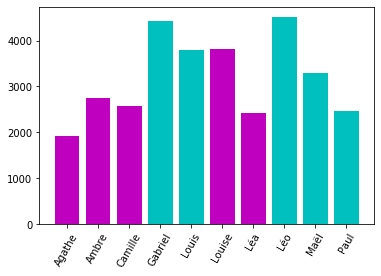

In [138]:
# bar plot
plt.bar(x=tab.index, height=tab['births'], color=list('mmmccmmccc'));  # testez avec barh
plt.xticks(rotation=60);

## 3. Graphiques avec seaborn

Extension de matplotlib orientée statistiques.

Voir : https://seaborn.pydata.org/api.html

In [139]:
# import
import seaborn as sns

#### countplot

Show the counts of observations in each categorical bin using bars.

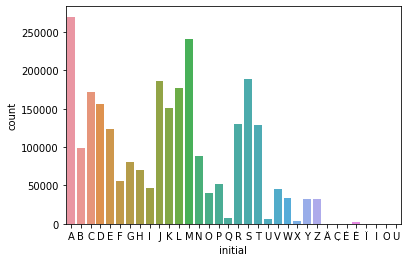

In [140]:
# countplot
df['initial'] = df['name'].str[0]
df = df.sort_values('initial')
sns.countplot(data=df, x='initial');

#### barplot

Show point estimates and confidence intervals as rectangular bars.

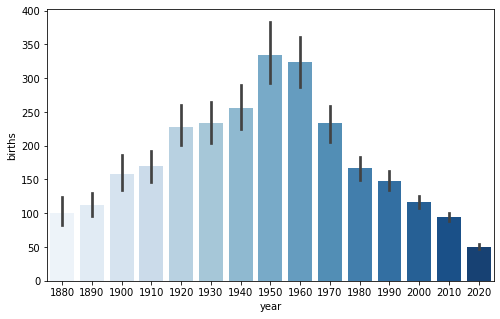

In [141]:
# seaborn barplot with births for decades
plt.figure(figsize=(8, 5))
var = df.loc[df['year'] % 10 == 0]
sns.barplot(data=var, x='year', y='births', palette='Blues');

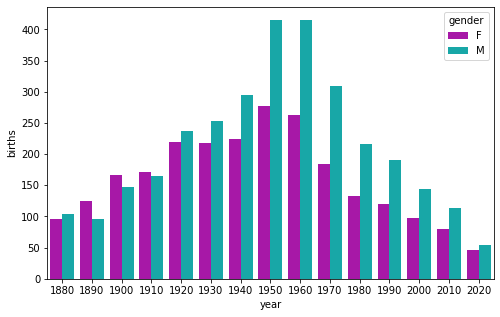

In [142]:
# seaborn barplot with births for decades + hue
plt.figure(figsize=(8, 5))
var = df.loc[df['year'] % 10 == 0]
sns.barplot(data=var, x='year', y='births', hue='gender', palette=['m', 'c'], ci=None);

#### displot

Flexibly plot a univariate distribution of observations.

In [143]:
# list of names which appear at least 10,000 times
var = df.pivot_table(index='name', values='births', aggfunc='sum')
var = var.loc[var['births'] >= 10_000]
names10000 = var.index

# data for names which appear at least 10,000 times
df10000 = df.loc[df['name'].isin(names10000)]
print(len(df10000))

# number of births by gender, and ratio F / (F + M)
var = df10000.pivot_table(index='name',
                          columns='gender',
                          values='births',
                          aggfunc='sum')
ratio = var['F'] / (var['F'] + var['M'])
ratio

568494


name
Aaliyah     0.998925
Aaron       0.007013
Abbey       0.997980
Abbie       0.985110
Abbigail    0.999576
              ...   
Zion        0.165495
Zoe         0.996444
Zoey        0.997578
Zora        0.997914
Zoé         0.994942
Length: 3192, dtype: float64

In [144]:
# seaborn distplot
var = df.loc[df['year'] % 10 == 0]
sns.displot(ratio, kde=False, bins=10);

AttributeError: module 'seaborn' has no attribute 'displot'

#### regplot

Plot data and a linear regression model fit.

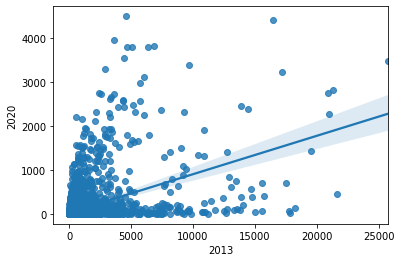

In [145]:
# select years year1 and year2
year1 = 2013
year2 = 2020
var = df.loc[df["year"].isin([year1, year2])]
var = var.pivot_table(values="births",
                      index="name",
                      columns="year",
                      aggfunc='sum')
sns.regplot(x=var[year1], y=var[year2]);

In [146]:
from scipy.stats import linregress

var = var.dropna()
print(linregress(var[2013].values, var[2020].values))

LinregressResult(slope=0.08738737455487557, intercept=33.856959151204336, rvalue=0.4661135132973257, pvalue=0.0, stderr=0.0016011238560321001)


#### stripplot

Draw a scatterplot where one variable is categorical.

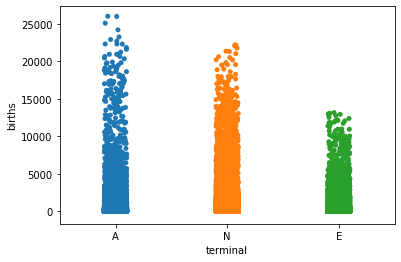

In [147]:
# stripplot horizontal
df['terminal'] = df['name'].str[-1].str.upper()
letters = list('AEN')
var = df.loc[df['terminal'].isin(letters) & (df['year'] > 2000) & (df['country'] == 'us')]
sns.stripplot(data=var, x='terminal', y='births');

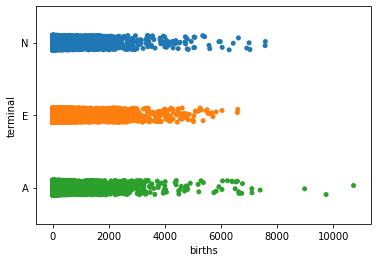

In [148]:
# stripplot vertical
var = df.loc[df['terminal'].isin(letters) & (df['year'] > 2000) & (df['country'] == 'fr')]
sns.stripplot(data=var, y='terminal', x='births');

#### heatmap

Plot rectangular data as a color-encoded matrix.

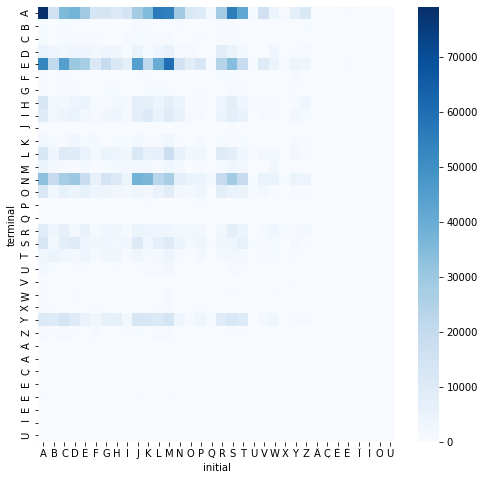

In [149]:
# heatmap
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
sns.heatmap(pd.crosstab(df['terminal'], df['initial']), cmap='Blues', ax=ax);

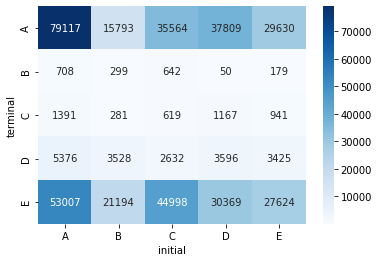

In [150]:
tab = pd.crosstab(df['terminal'], df['initial']).iloc[:5, :5]
sns.heatmap(tab, cmap='Blues', annot=True, fmt='d');

## 5. Cartes : maplotlib, plotly, ipyleaflet

### 5.1 Cartes naives avec matplotlib

In [152]:
# communes de France

df = pd.read_csv('correspondance-code-insee-code-postal.csv',
                sep=';')
df[['Latitude', 'Longitude']] = df['geo_point_2d'].str.extract('(.*), (.*)').astype(float)
df.shape

(36742, 19)

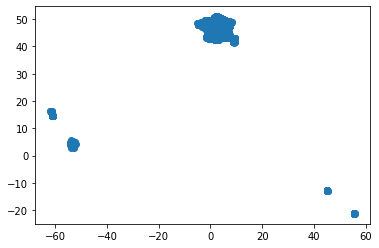

In [153]:
# carte naive
plt.scatter(df['Longitude'], df['Latitude']);

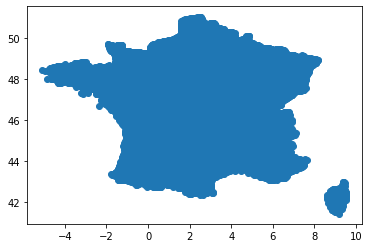

In [154]:
# métro : projection cylindrique équidistante vs Mercator
metro = df.loc[df['Latitude'] > 40]
plt.scatter(metro['Longitude'], metro['Latitude']);

Prise en compte du relief.

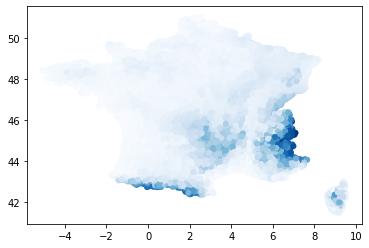

In [155]:
# nuancier bleu
plt.scatter(metro["Longitude"],
            metro["Latitude"],
            c=metro["Altitude Moyenne"],
            cmap=plt.cm.Blues,
            edgecolors='none');

Avec tri des altitudes.

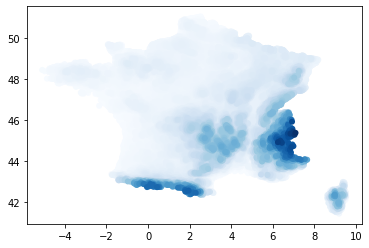

In [156]:
# nuancier bleu avec tri des valeurs
metro = metro.sort_values("Altitude Moyenne")
plt.scatter(metro["Longitude"],
            metro["Latitude"],
            c=metro["Altitude Moyenne"],
            cmap=plt.cm.Blues,
            edgecolors='none');

Avec une autre palette de couleur et une colorbar.

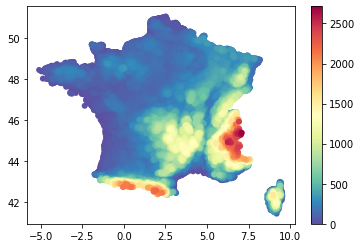

In [157]:
# on utilise plt.cm.Spectral_r
var = plt.scatter(x=metro["Longitude"],
            y=metro["Latitude"],
            c=metro["Altitude Moyenne"],
            cmap=plt.cm.Spectral_r,
            edgecolors='none')
plt.colorbar(var);

**Remarque**

Il existe dans *matplotlib* (et *seaborn*) un système de palettes de couleurs :

- matplotlib : http://matplotlib.org/users/colormaps.html

- seaborn : http://seaborn.pydata.org/tutorial/color_palettes.html

Les librairies gèrent également :

- Les palettes de couleurs de **ColorBrewer** : http://colorbrewer2.org

- Les 954 couleurs nommées de manière participative par l'initiative **xkcd** : https://xkcd.com/color/rgb/ Voir également le blog : https://blog.xkcd.com/2010/05/03/color-survey-results/

### 5.2 Cartes avec plotly

Plotly Python Open Source Graphing Library

Plotly's Python graphing library makes interactive, publication-quality graphs.

Voir : https://plotly.com/python/

La société canadienne plotly édite également la librairie **dash**.

Voir : https://plotly.com/dash/

In [161]:
conda install plotly

Solving environment: done

## Package Plan ##

  environment location: /Users/nico/opt/anaconda3

  added / updated specs:
    - plotly


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.10.3               |   py37hecd8cb5_0         2.9 MB
    plotly-3.6.1               |           py37_0        12.9 MB
    retrying-1.3.3             |           py37_2          16 KB
    ------------------------------------------------------------
                                           Total:        15.7 MB

The following NEW packages will be INSTALLED:

  plotly             pkgs/main/osx-64::plotly-3.6.1-py37_0
  retrying           pkgs/main/osx-64::retrying-1.3.3-py37_2

The following packages will be UPDATED:

  conda                                        4.8.3-py37_0 --> 4.10.3-py37hecd8cb5_0



retrying-1.3.3       | 16 KB     | ##################################### | 100% 
conda-4.10.3 

In [168]:
pip install colorlover

You should consider upgrading via the '/Users/nico/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [169]:
# import
from plotly.offline import iplot, init_notebook_mode
import colorlover as cl

# init
init_notebook_mode(connected=True)

In [170]:
# pays
var = pd.read_html('https://www.geonames.org/countries/',
                   header=0,
                   keep_default_na=False)  # NA = North America
df = var[1]
df.shape

(250, 9)

Carte mondiale : programmation déclarative

In [172]:
# carte mondiale
data = [{
        'type': 'choropleth',
        'locations': df['ISO-3166alpha3'],
        'z': df['Population'],
        'text': df['Country'],
        'colorscale': list(zip(np.linspace(0, 1, 9), cl.scales['9']['seq']['Reds'])),
        'autocolorscale': False,
        'reversescale': False,
        'marker': {
            'line': {
                'color': 'rgb(180,180,180)',
                'width': 0.5
            }},
        'colorbar':
            {'autotick': False,
            'title': 'Population'},
        }]

layout = {
    'title': '<br>Source:\
            <a href="https://www.geonames.org/countries/">\
            geonames</a>',
    'geo': {
        'showcountries': True,
        'showframe': False,
        'showcoastlines': False,
        'projection': {
            'type': 'natural earth'  # 'mercator'
        }
    }
}


fig = {'data': data, 'layout': layout}
iplot(fig, validate=False, filename='d3-world-map')

**Exercice n° 5**

- Ajoutez une colonne 'Densité'
- Affichez la densité en niveaux de bleus (cherchez une correction des données pour obtenir un affichage pertinent).
- Prenez une projection aléatoire parmi : 'equirectangular', 'mercator', 'orthographic', 'natural earth', 'kavrayskiy7', 'miller', 'robinson', 'eckert4', 'azimuthal equal area', 'azimuthal equidistant', 'conic equal area', 'conic conformal', 'conic equidistant', 'gnomonic', 'stereographic', 'mollweide', 'hammer', 'transverse mercator' en utilisant numpy.random.choice()

### 5.3 Geocoding avec geopy et cartes avec ipyleaflet

ipyleaflet provides interactive maps in the Jupyter notebook based on leaflet.js JavaScript library and OpenStreetMap.

Installation (in a shell):

    conda install -c conda-forge geopy or pip install geopy

    conda install -c conda-forge ipyleaflet or pip install ipyleaflet

    jupyter nbextension enable --py --sys-prefix ipyleaflet


**geopy** : informations sur une adresse physique.

Voir : https://geopy.readthedocs.io/en/stable/index.html

In [173]:
# mandatory if Python ssl.SSLError occurs
#import ssl
#import certifi
#ctx = ssl.create_default_context(cafile=certifi.where())
#geopy.geocoders.options.default_ssl_context = ctx
#import geopy

from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent='telecom_paris', timeout=7)
location = geolocator.geocode('19 Place Marguerite Perey, 91120 Palaiseau, France')
location.raw

ModuleNotFoundError: No module named 'geopy'

In [ ]:
# get latitude and longitude
lat, lon = location.raw['lat'], location.raw['lon']
lat, lon

**Plan**

In [ ]:
# demo
from ipyleaflet import Map

# map arround 48.71, 2.20
m = Map(center=(lat, lon), zoom=18)
m

**Image satellite**

In [ ]:
# satellite map
from datetime import datetime, timedelta
from ipyleaflet import basemaps, basemap_to_tiles

# satellite map for yesterday
# NASA's Global Imagery Browse Services
yesterday = datetime.now() - timedelta(days=1)
nasa = basemap_to_tiles(basemaps.NASAGIBS.ModisTerraTrueColorCR, yesterday.strftime('%Y-%m-%d'))
m = Map(layers=(nasa, ), center=(lat, lon), zoom=4)

m

**Autre carte...**

In [ ]:
# villes
df = pd.read_csv('cities500.zip',
                 sep='\t',header=None,
                 keep_default_na=False,  # NA = North America
                 na_values=['', -9999],
                 names=['geonameid', 'name', 'asciiname', 'alternatenames', 'latitude', 
                        'longitude', 'feature class', 'feature code', 'country code',
                        'cc2', 'admin1 code', 'admin2 code', 'admin3 code', 'admin4 code',
                        'population', 'elevation', 'dem', 'timezone', 'modification date'],
                        dtype={'admin1 code': str,
                               'admin2 code': str,
                               'admin3 code': str,
                               'admin4 code': str})
df.shape

In [ ]:
# map with markers

from ipyleaflet import Marker, LayerGroup

watercolor = basemap_to_tiles(basemaps.Stamen.Watercolor)
m = Map(layers=(watercolor, ), center=(50, 50), zoom=1)

# add markers for cities with population >= 3M
df2 = df.loc[df['population'] >= 3e6]
layers = []
for i, row in df2.iterrows():
    marker = Marker(location=(row['latitude'], row['longitude']),
                    draggable=False,
                    title=row['name'])
    layers.append(marker)
layer_group = LayerGroup(layers=layers)
m.add_layer(layer_group)

m